<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/HackPlacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c gdscjmi-hack-placements

  0% 0.00/16.5k [00:00<?, ?B/s]
100% 16.5k/16.5k [00:00<00:00, 16.2MB/s]
  0% 0.00/592 [00:00<?, ?B/s]
100% 592/592 [00:00<00:00, 371kB/s]
  0% 0.00/3.88k [00:00<?, ?B/s]
100% 3.88k/3.88k [00:00<00:00, 4.06MB/s]


In [ ]:
train=pd.read_csv('train.csv')
train

,sl_no,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,202,Male,54.2,63.0,Central,Others,Science,Commerce,58.0,Marketing&HR,58.44,No,79.00,Not Placed
1,32,Female,67.0,53.0,Central,Central,Science,Engineering,65.0,Marketing&HR,58.32,No,64.00,Not Placed
2,194,Female,60.0,63.0,Central,Central,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.00,Placed
3,153,Female,75.4,60.5,Others,Central,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.00,Placed
4,43,Male,49.0,39.0,Others,Central,Science,Others,65.0,Marketing&Finance,51.21,No,63.00,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,81,Female,69.0,62.0,Others,Others,Commerce,Commerce,69.0,Marketing&HR,62.35,Yes,67.00,Placed
168,176,Male,63.0,62.0,Others,Others,Science,Engineering,65.0,Marketing&HR,60.69,No,87.50,Not Placed
169,211,Male,80.6,82.0,Others,Others,Commerce,Commerce,77.6,Marketing&Finance,74.49,No,91.00,Placed
170,195,Male,52.0,55.0,Others,Others,Commerce,Commerce,56.3,Marketing&Finance,64.74,No,59.00,Not Placed


In [ ]:
test=pd.read_csv('test.csv')
test.shape

(43, 13)

In [ ]:
pd.value_counts(train['status'])

Placed        116
Not Placed     56
Name: status, dtype: int64

In [ ]:
train.drop(columns=['sl_no'], axis=1, inplace=True)
train


,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks,status
0,Male,54.2,63.0,Central,Others,Science,Commerce,58.0,Marketing&HR,58.44,No,79.00,Not Placed
1,Female,67.0,53.0,Central,Central,Science,Engineering,65.0,Marketing&HR,58.32,No,64.00,Not Placed
2,Female,60.0,63.0,Central,Central,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.00,Placed
3,Female,75.4,60.5,Others,Central,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.00,Placed
4,Male,49.0,39.0,Others,Central,Science,Others,65.0,Marketing&Finance,51.21,No,63.00,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Female,69.0,62.0,Others,Others,Commerce,Commerce,69.0,Marketing&HR,62.35,Yes,67.00,Placed
168,Male,63.0,62.0,Others,Others,Science,Engineering,65.0,Marketing&HR,60.69,No,87.50,Not Placed
169,Male,80.6,82.0,Others,Others,Commerce,Commerce,77.6,Marketing&Finance,74.49,No,91.00,Placed
170,Male,52.0,55.0,Others,Others,Commerce,Commerce,56.3,Marketing&Finance,64.74,No,59.00,Not Placed


In [ ]:
X_train=train.drop(columns=['status'], axis=1)
X_train


,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,Male,54.2,63.0,Central,Others,Science,Commerce,58.0,Marketing&HR,58.44,No,79.00
1,Female,67.0,53.0,Central,Central,Science,Engineering,65.0,Marketing&HR,58.32,No,64.00
2,Female,60.0,63.0,Central,Central,Arts,Others,56.0,Marketing&HR,56.63,Yes,80.00
3,Female,75.4,60.5,Others,Central,Science,Engineering,84.0,Marketing&Finance,65.25,No,98.00
4,Male,49.0,39.0,Others,Central,Science,Others,65.0,Marketing&Finance,51.21,No,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Female,69.0,62.0,Others,Others,Commerce,Commerce,69.0,Marketing&HR,62.35,Yes,67.00
168,Male,63.0,62.0,Others,Others,Science,Engineering,65.0,Marketing&HR,60.69,No,87.50
169,Male,80.6,82.0,Others,Others,Commerce,Commerce,77.6,Marketing&Finance,74.49,No,91.00
170,Male,52.0,55.0,Others,Others,Commerce,Commerce,56.3,Marketing&Finance,64.74,No,59.00


In [ ]:
train.isna().any().sum()

0

In [ ]:
test.isna().any().sum()

0

In [ ]:
train['gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
test

,sl_no,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,8,Male,82.00,64.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,62.14,Yes,67.00
1,70,Male,73.00,73.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,68.07,Yes,70.00
2,160,Male,52.00,49.00,Central,Others,Commerce,Commerce,58.00,Marketing&HR,60.59,No,62.00
3,99,Female,69.00,73.00,Central,Central,Commerce,Commerce,65.00,Marketing&Finance,57.31,No,70.00
4,88,Male,59.60,51.00,Central,Central,Science,Others,60.00,Marketing&HR,59.08,No,75.00
5,28,Male,63.00,67.00,Others,Others,Commerce,Commerce,66.00,Marketing&HR,57.69,No,68.00
6,196,Male,66.00,76.00,Central,Central,Commerce,Commerce,72.00,Marketing&HR,58.95,Yes,84.00
7,174,Female,52.00,52.00,Others,Others,Science,Engineering,55.00,Marketing&HR,59.32,No,67.00
8,152,Male,65.00,65.00,Central,Central,Commerce,Commerce,75.00,Marketing&Finance,58.87,No,83.00
9,102,Male,63.00,72.00,Central,Central,Commerce,Commerce,68.00,Marketing&HR,60.44,No,78.00


In [ ]:
test.columns

Index(['sl_no', 'gender', '10th_marks', '12th_marks', '10th_board',
       '12th_board', '12th_stream', 'undergrad_type', 'undergrad_marks',
       'specialisation', 'mba_marks', 'work_experience',
       'preplacement_test_marks'],
      dtype='object')

In [ ]:
X_test=test.drop(columns=['sl_no'], axis=1)
X_test

,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,Male,82.00,64.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,62.14,Yes,67.00
1,Male,73.00,73.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,68.07,Yes,70.00
2,Male,52.00,49.00,Central,Others,Commerce,Commerce,58.00,Marketing&HR,60.59,No,62.00
3,Female,69.00,73.00,Central,Central,Commerce,Commerce,65.00,Marketing&Finance,57.31,No,70.00
4,Male,59.60,51.00,Central,Central,Science,Others,60.00,Marketing&HR,59.08,No,75.00
5,Male,63.00,67.00,Others,Others,Commerce,Commerce,66.00,Marketing&HR,57.69,No,68.00
6,Male,66.00,76.00,Central,Central,Commerce,Commerce,72.00,Marketing&HR,58.95,Yes,84.00
7,Female,52.00,52.00,Others,Others,Science,Engineering,55.00,Marketing&HR,59.32,No,67.00
8,Male,65.00,65.00,Central,Central,Commerce,Commerce,75.00,Marketing&Finance,58.87,No,83.00
9,Male,63.00,72.00,Central,Central,Commerce,Commerce,68.00,Marketing&HR,60.44,No,78.00


In [ ]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_train

,10th_marks,12th_marks,undergrad_marks,mba_marks,preplacement_test_marks,gender_Male,10th_board_Others,12th_board_Others,12th_stream_Commerce,12th_stream_Science,undergrad_type_Engineering,undergrad_type_Others,specialisation_Marketing&HR,work_experience_Yes
0,54.2,63.0,58.0,58.44,79.00,1,0,1,0,1,0,0,1,0
1,67.0,53.0,65.0,58.32,64.00,0,0,0,0,1,1,0,1,0
2,60.0,63.0,56.0,56.63,80.00,0,0,0,0,0,0,1,1,1
3,75.4,60.5,84.0,65.25,98.00,0,1,0,0,1,1,0,0,0
4,49.0,39.0,65.0,51.21,63.00,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,69.0,62.0,69.0,62.35,67.00,0,1,1,1,0,0,0,1,1
168,63.0,62.0,65.0,60.69,87.50,1,1,1,0,1,1,0,1,0
169,80.6,82.0,77.6,74.49,91.00,1,1,1,1,0,0,0,0,0
170,52.0,55.0,56.3,64.74,59.00,1,1,1,1,0,0,0,0,0


In [ ]:
X_test=pd.get_dummies(X_test, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-1.18372065, -0.29152546, -1.16970355, ..., -0.22086305,
         1.08499548, -0.72258141],
       [-0.03217283, -1.18658943, -0.22201431, ..., -0.22086305,
         1.08499548, -0.72258141],
       [-0.66192554, -0.29152546, -1.4404719 , ...,  4.52769257,
         1.08499548,  1.38392711],
       ...,
       [ 1.19134672,  1.40909609,  1.48382632, ..., -0.22086305,
        -0.92166283, -0.72258141],
       [-1.38164293, -1.00757664, -1.39985665, ..., -0.22086305,
        -0.92166283, -0.72258141],
       [ 1.49722661,  2.20570303, -0.2897064 , ..., -0.22086305,
        -0.92166283, -0.72258141]])

In [ ]:
X_test

array([[ 1.31729727e+00, -2.02019061e-01, -8.66301311e-02,
        -3.56512389e-02, -4.06676618e-01,  7.69800359e-01,
        -9.43456353e-01, -1.28302527e+00, -1.03551396e+00,
         1.13724814e+00,  1.56204994e+00, -2.20863052e-01,
        -9.21662826e-01,  1.38392711e+00],
       [ 5.07615207e-01,  6.03538516e-01, -8.66301311e-02,
         9.61683858e-01, -1.84510129e-01,  7.69800359e-01,
        -9.43456353e-01, -1.28302527e+00, -1.03551396e+00,
         1.13724814e+00,  1.56204994e+00, -2.20863052e-01,
        -9.21662826e-01,  1.38392711e+00],
       [-1.38164293e+00, -1.54461502e+00, -1.16970355e+00,
        -2.96337478e-01, -7.76954098e-01,  7.69800359e-01,
        -9.43456353e-01,  7.79407875e-01,  9.65704028e-01,
        -8.79315573e-01, -6.40184400e-01, -2.20863052e-01,
         1.08499548e+00, -7.22581410e-01],
       [ 1.47756515e-01,  6.03538516e-01, -2.22014308e-01,
        -8.47983198e-01, -1.84510129e-01, -1.29903811e+00,
        -9.43456353e-01, -1.28302527e+00,  9.

In [ ]:
index=test.columns
index

Index(['sl_no', 'gender', '10th_marks', '12th_marks', '10th_board',
       '12th_board', '12th_stream', 'undergrad_type', 'undergrad_marks',
       'specialisation', 'mba_marks', 'work_experience',
       'preplacement_test_marks'],
      dtype='object')

In [ ]:
test.drop(columns=['sl_no'], axis=1, inplace=True)
test

,gender,10th_marks,12th_marks,10th_board,12th_board,12th_stream,undergrad_type,undergrad_marks,specialisation,mba_marks,work_experience,preplacement_test_marks
0,Male,82.00,64.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,62.14,Yes,67.00
1,Male,73.00,73.00,Central,Central,Science,Engineering,66.00,Marketing&Finance,68.07,Yes,70.00
2,Male,52.00,49.00,Central,Others,Commerce,Commerce,58.00,Marketing&HR,60.59,No,62.00
3,Female,69.00,73.00,Central,Central,Commerce,Commerce,65.00,Marketing&Finance,57.31,No,70.00
4,Male,59.60,51.00,Central,Central,Science,Others,60.00,Marketing&HR,59.08,No,75.00
5,Male,63.00,67.00,Others,Others,Commerce,Commerce,66.00,Marketing&HR,57.69,No,68.00
6,Male,66.00,76.00,Central,Central,Commerce,Commerce,72.00,Marketing&HR,58.95,Yes,84.00
7,Female,52.00,52.00,Others,Others,Science,Engineering,55.00,Marketing&HR,59.32,No,67.00
8,Male,65.00,65.00,Central,Central,Commerce,Commerce,75.00,Marketing&Finance,58.87,No,83.00
9,Male,63.00,72.00,Central,Central,Commerce,Commerce,68.00,Marketing&HR,60.44,No,78.00


In [ ]:
y_train=train.iloc[:,-1]
y_train

0      Not Placed
1      Not Placed
2          Placed
3          Placed
4      Not Placed
          ...    
167        Placed
168    Not Placed
169        Placed
170    Not Placed
171        Placed
Name: status, Length: 172, dtype: object

In [ ]:
y_train=y_train.map({'Not Placed':0, 'Placed':1})
y_train

0      0
1      0
2      1
3      1
4      0
      ..
167    1
168    0
169    1
170    0
171    1
Name: status, Length: 172, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
exModel=ExtraTreesClassifier()
exModel.fit(X_train, y_train)
ex_feature_importance=exModel.feature_importances_

In [ ]:
X_train

In [ ]:
test1=pd.get_dummies(test, drop_first=True)


In [ ]:
print(ex_feature_importance)

[0.21215393 0.14344675 0.14509952 0.09219485 0.08355495 0.04222793
 0.03833428 0.0338661  0.02522778 0.0228121  0.0292634  0.00915026
 0.05686538 0.06580278]


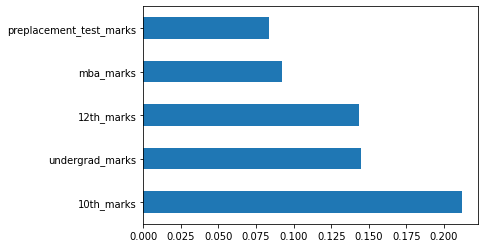

In [ ]:
feat_importances = pd.Series(ex_feature_importance, index=test1.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rfModel=RandomForestClassifier()
xgModel=XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rfModel, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
y_pred=rf_random.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
len(y_pred)

43

In [ ]:
result=np.column_stack((test.iloc[:,], y_pred))
result

array([['Male', 1],
       ['Male', 1],
       ['Male', 0],
       ['Female', 1],
       ['Male', 0],
       ['Male', 1],
       ['Male', 1],
       ['Female', 0],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Female', 1],
       ['Female', 1],
       ['Male', 0],
       ['Male', 1],
       ['Male', 1],
       ['Female', 0],
       ['Male', 1],
       ['Male', 0],
       ['Female', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 0],
       ['Female', 0],
       ['Female', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 0],
       ['Female', 1],
       ['Male', 1],
       ['Female', 1],
       ['Female', 1],
       ['Male', 1],
       ['Male', 1],
       ['Male', 0],
       ['Female', 1]], dtype=object)